<a href="https://colab.research.google.com/github/Jonathann-andr/PenelitianCNN/blob/main/CNNAdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, re, glob, cv2, numpy as np, matplotlib.pyplot as plt

from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator
 

path = os.path.abspath('Covid19.ipynb') #absolute path of program
path = re.sub('[a-zA-Z\s._]+$', '', path) #remove unintended file
dirs = os.listdir('/content/drive/My Drive/Project_SIB/Citra_Awal//') #list directory in Land Use Images folder
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/My Drive/Project_SIB/Citra_Awal/'+i+'/*'):
        im = cv2.imread(pic) #open image
        #im = cv2.resize(im,(70,70))
        im = np.array(im) #change into array

        # expand dimension to one sample
        samples = expand_dims(im, 0)
        # create image data augmentation generator
        datagen = ImageDataGenerator(rotation_range=90)
        # prepare iterator
        it = datagen.flow(samples, batch_size=1)
        # generate samples and plot
        for j in range(9):
          # define subplot
          #plt.subplot(330 + 1 + j)
          # generate batch of images
          batch = it.next()
          # convert to unsigned integers for viewing
          image = batch[0].astype('uint8')

          count = count + 1
          X.append(image)
          y.append(label)
          if(count <= 5): #SAmple
            im_arr.append({str(i):image})
          
          # plot raw pixel data
          #plt.imshow(image)
        #print(str(i)+" Data : "+ str(count-8) + " - " + str(count))
        # show the figure
        #plt.show()  
        
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)

X = np.array(X)
y = np.array(y);

Jumlah 102 Babi : 540
Jumlah 103 Domba : 540
Jumlah 104 Kambing : 540
Jumlah 107 Kanguru : 540
Jumlah 101_Sapi : 540
Jumlah my_model.hdf5 : 0


In [ ]:
len(y)

2700

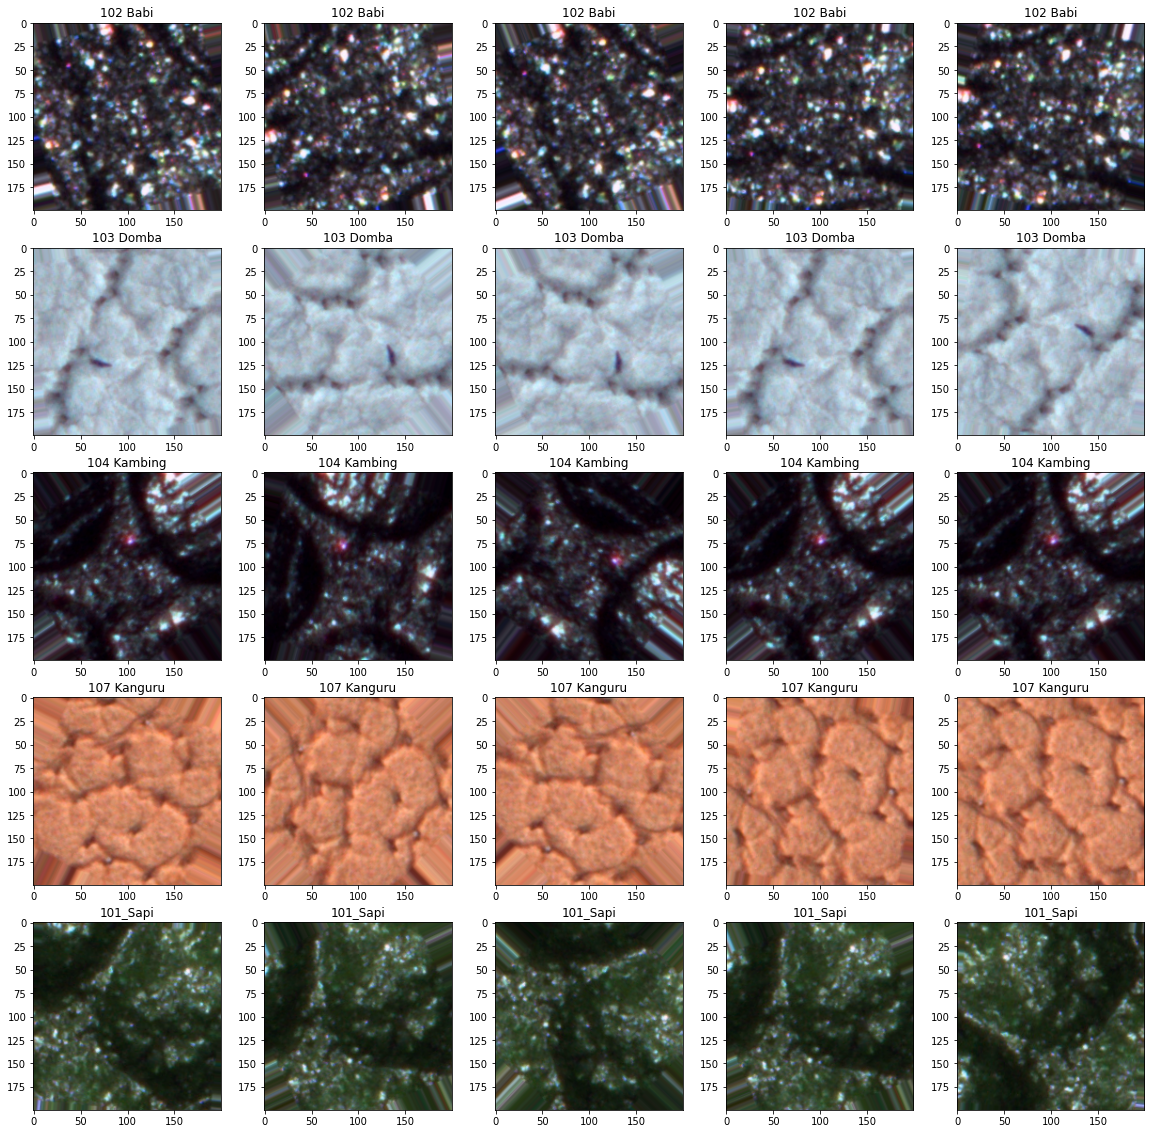

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 5, figsize=(20, 20))
cnt = 0
row = 0
col = 0
for i in im_arr:
    for key, value in i.items():
        if(cnt==5):
            row = row + 1
            col = 0
            cnt = 0
        axs[row, col].imshow(value)
        axs[row, col].set_title(key)
        cnt = cnt + 1
        col = col + 1
plt.show()

In [ ]:
# PREPROCESSING
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.1, random_state=42)

X_train = X_train.astype('float32') #set x_train data type as float32
X_test = X_test.astype('float32') #set x_test data type as float32
X_train /= 255 #change x_train value between 0 - 1
X_test /= 255 #change x_test value between 0 - 1
y_train = to_categorical(y_train, 5) #change label to binary / categorical: [1 0 0 0] = 0, [0 1 0 0] = 1, so on
y_test = to_categorical(y_test, 5) #change label to binary / categorical

In [ ]:
len(X_train)

2430

In [ ]:
# ARSITEKTUR
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(200,200,3))) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Conv2D(64, (5, 5), activation='relu')) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Dropout(0.25)) #delete neuron randomly while training and remain 75%
model.add(Flatten()) #make layer flatten
model.add(Dense(128, activation='relu')) #fully connected layer
model.add(Dropout(0.5)) #delete neuron randomly and remain 50%
model.add(Dense(5, activation='softmax')) #softmax works

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 47, 47, 64)        0         
                                                                 
 flatten (Flatten)           (None, 141376)            0

OPTIMIZER


In [ ]:
print(X_train.shape)

(2430, 200, 200, 3)


In [ ]:
from tensorflow.keras.optimizers import Adam

lrate = 0.0001
adam = Adam(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 47, 47, 64)        0         
                                                                 
 flatten (Flatten)           (None, 141376)            0

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Learning rate : %.3f" % (lrate))

Epoch 1/60
76/76 [==============================] - 234s 3s/step - loss: 1.3993 - accuracy: 0.3770 - val_loss: 1.0802 - val_accuracy: 0.5963
Epoch 2/60
76/76 [==============================] - 231s 3s/step - loss: 1.0809 - accuracy: 0.5317 - val_loss: 0.8902 - val_accuracy: 0.6037
Epoch 3/60
76/76 [==============================] - 238s 3s/step - loss: 0.9216 - accuracy: 0.5992 - val_loss: 0.7912 - val_accuracy: 0.6000
Epoch 4/60
76/76 [==============================] - 236s 3s/step - loss: 0.8257 - accuracy: 0.6420 - val_loss: 0.7333 - val_accuracy: 0.6333
Epoch 5/60
76/76 [==============================] - 237s 3s/step - loss: 0.7465 - accuracy: 0.6782 - val_loss: 0.6768 - val_accuracy: 0.6333
Epoch 6/60
76/76 [==============================] - 235s 3s/step - loss: 0.6916 - accuracy: 0.7045 - val_loss: 0.6688 - val_accuracy: 0.6481
Epoch 7/60
76/76 [==============================] - 236s 3s/step - loss: 0.6502 - accuracy: 0.7136 - val_loss: 0.5971 - val_accuracy: 0.7000
Epoch 8/60
76

In [ ]:
 import tensorflow as tf
tf.keras.models.save_model(model, 'my_model.hdf5')

In [ ]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import tensorflow.keras

In [ ]:
import h5py

In [ ]:
hdf5_path = '/content/drive/My Drive/HUAWEI/MODEL FIX/ADAM/Epoch 60/modelbagus2.hdf5'

In [ ]:
model = tf.keras.models.load_model(hdf5_path)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 47, 47, 64)        0         
                                                                 
 flatten (Flatten)           (None, 141376)            0

In [ ]:
import os, re, glob, cv2, numpy as np, matplotlib.pyplot as plt

from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator
 

path = os.path.abspath('Covid19.ipynb') #absolute path of program
path = re.sub('[a-zA-Z\s._]+$', '', path) #remove unintended file
dirs = os.listdir('/content/drive/My Drive/Project_SIB/Citra_Awal//') #list directory in Land Use Images folder
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/My Drive/Project_SIB/Citra_Awal/'+i+'/*'):
        im = cv2.imread(pic) #open image
        #im = cv2.resize(im,(70,70))
        im = np.array(im) #change into array

        # expand dimension to one sample
        samples = expand_dims(im, 0)
        # create image data augmentation generator
        datagen = ImageDataGenerator(rotation_range=90)
        # prepare iterator
        it = datagen.flow(samples, batch_size=1)
        # generate samples and plot
        for j in range(9):
          # define subplot
          #plt.subplot(330 + 1 + j)
          # generate batch of images
          batch = it.next()
          # convert to unsigned integers for viewing
          image = batch[0].astype('uint8')

          count = count + 1
          X.append(image)
          y.append(label)
          if(count <= 5): #SAmple
            im_arr.append({str(i):image})
          
          # plot raw pixel data
          #plt.imshow(image)
        #print(str(i)+" Data : "+ str(count-8) + " - " + str(count))
        # show the figure
        #plt.show()  
        
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)

X = np.array(X)
y = np.array(y);

Jumlah 102 Babi : 540
Jumlah 103 Domba : 540
Jumlah 104 Kambing : 540
Jumlah 107 Kanguru : 540
Jumlah 101_Sapi : 540
Jumlah my_model.hdf5 : 0


In [ ]:
len(y)

2700

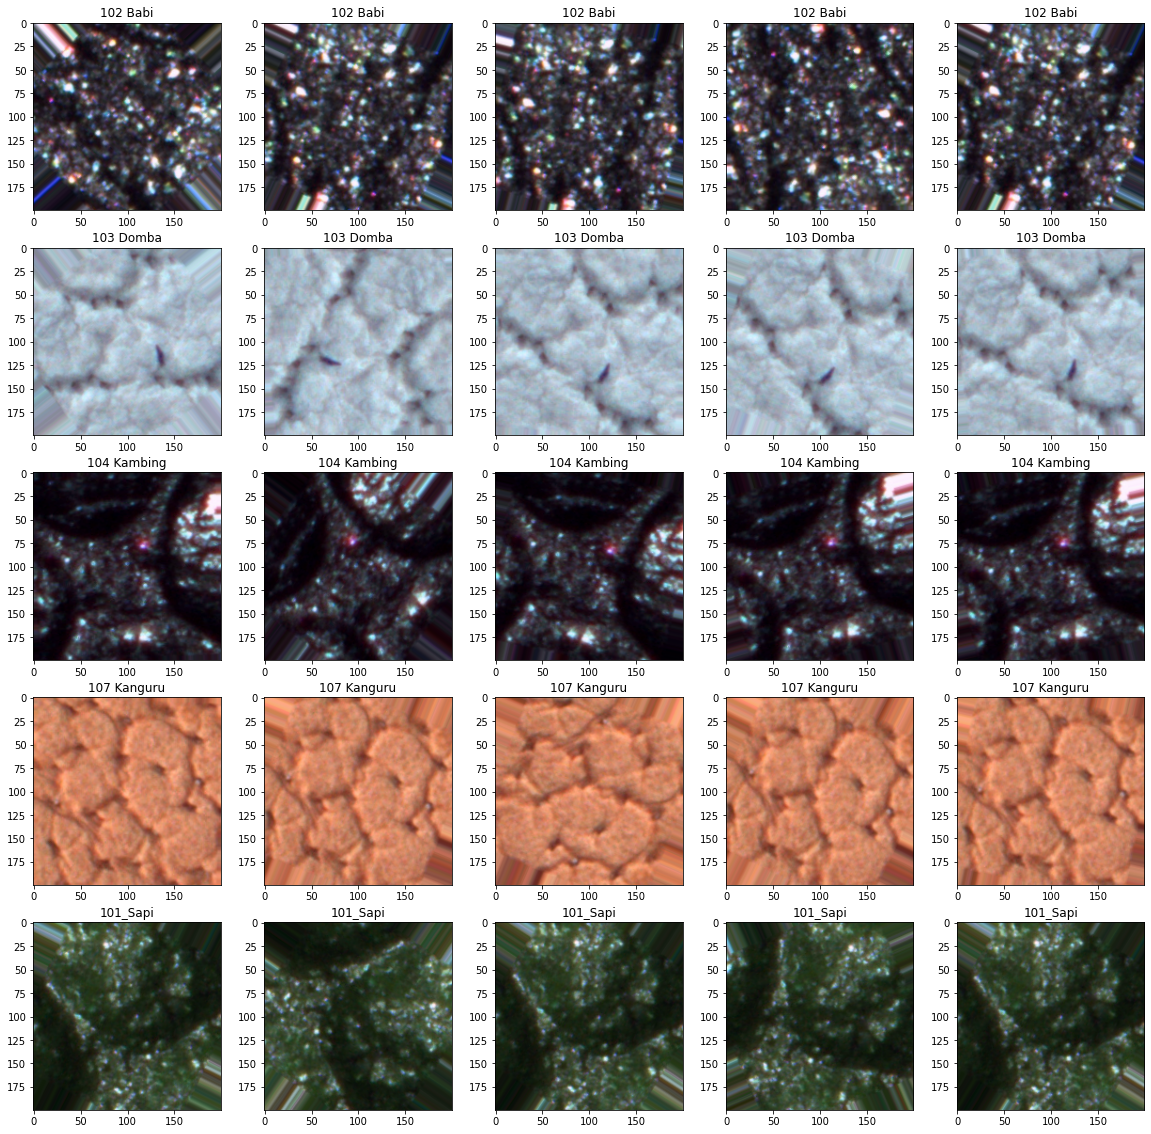

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 5, figsize=(20, 20))
cnt = 0
row = 0
col = 0
for i in im_arr:
    for key, value in i.items():
        if(cnt==5):
            row = row + 1
            col = 0
            cnt = 0
        axs[row, col].imshow(value)
        axs[row, col].set_title(key)
        cnt = cnt + 1
        col = col + 1
plt.show()

In [ ]:
# PREPROCESSING
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.1, random_state=42)

X_train = X_train.astype('float32') #set x_train data type as float32
X_test = X_test.astype('float32') #set x_test data type as float32
X_train /= 255 #change x_train value between 0 - 1
X_test /= 255 #change x_test value between 0 - 1
y_train = to_categorical(y_train, 5) #change label to binary / categorical: [1 0 0 0] = 0, [0 1 0 0] = 1, so on
y_test = to_categorical(y_test, 5) #change label to binary / categorical

In [ ]:
len(X_train)

2430

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([[9.99965668e-01, 5.18416421e-08, 3.43532374e-05, 5.16937284e-08,
        1.02179888e-11],
       [1.42361245e-07, 3.89888010e-04, 5.83020192e-05, 9.99533057e-01,
        1.86400794e-05],
       [1.04924925e-02, 9.88896728e-01, 6.00634725e-04, 5.98726547e-06,
        4.08467395e-06],
       ...,
       [6.98257238e-04, 9.83462751e-01, 1.13844881e-02, 4.39092424e-03,
        6.34925236e-05],
       [1.48547679e-06, 5.04893542e-05, 8.09624034e-05, 9.99866724e-01,
        3.11606357e-07],
       [6.33501622e-05, 2.30586343e-03, 4.95111058e-03, 4.07718457e-02,
        9.51907873e-01]], dtype=float32)

In [ ]:
# ITERASI X_TEST
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
    max_n = max(y_pred[i])
    max_m = max(y_test[i])
    index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
    index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
    y_prediction_n.append(index_n)
    y_test_n.append(index_m)

In [ ]:


#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, target_names=["Sapi","Kangguru", "Domba", "Babi", "Kambing"]))



              precision    recall  f1-score   support

        Sapi       1.00      0.89      0.94        54
    Kangguru       0.85      0.85      0.85        54
       Domba       0.82      0.91      0.86        54
        Babi       0.91      0.93      0.92        54
     Kambing       0.98      0.96      0.97        54

    accuracy                           0.91       270
   macro avg       0.91      0.91      0.91       270
weighted avg       0.91      0.91      0.91       270



In [ ]:
y_test_class = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_n, y_prediction_n))
confusion_matrix(y_test_n, y_prediction_n)

0.9074074074074074


array([[48,  3,  3,  0,  0],
       [ 0, 46,  5,  3,  0],
       [ 0,  2, 49,  2,  1],
       [ 0,  2,  2, 50,  0],
       [ 0,  1,  1,  0, 52]])

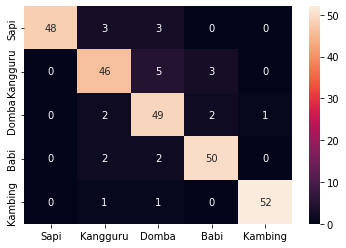

In [ ]:
cm = confusion_matrix(y_test_n, y_prediction_n)
sn.heatmap(cm, annot=True, xticklabels=["Sapi","Kangguru", "Domba", "Babi", "Kambing",], yticklabels=["Sapi","Kangguru",  "Domba", "Babi", "Kambing"])